<a href="https://colab.research.google.com/github/ella00100/data_analytics/blob/main/Home_Credit_Default_Risk_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Credit Default Risk Competition

- 이 대회의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것입니다. 

- Supervised: 라벨은 교육 데이터에 포함되어 있으며 목표는 모델이 features로부터 라벨을 예측하는 방법을 학습하도록 훈련하는 것입니다

- Classification: label은 이진 변수입니다. 0(대출을 제때 상환함), 1(대출을 상환하는 데 어려움이 있음)

#Data

- 이 데이터는 은행에 가입하지 않은 사람들에게 신용대출(대출)을 제공하는 서비스인 "Home Credit"에서 제공합니다. 고객이 대출금을 상환할 것인지 또는 어려움을 겪을 것인지를 예측하는 것은 매우 중요한 비즈니스 요구사항이며, Home Credit은 이 작업에서 머신 러닝 커뮤니티가 어떤 모델을 개발할 수 있는지 알아보기 위해 Kaggle에서 이 대회를 개최하고 있습니다.

- 7개의 data source
  - application_train/application_test
    - Home Credit의 각 대출 신청에 대한 정보가 포함된 주요 교육 및 테스트 데이터. 
    - 모든 대출에는 고유한 행이 있으며 SK_ID_CURR로 식별됩니다.
    - training application data에는 Target이 0: 대출금 상환 또는 1: 대출금 미상환으로 표시되어 있습니다.

  - Bureau
    - 고객의 다른 금융 기관으로부터의 이전 신용에 관한 데이터. 
    - 각 previous credit에는 고유한 행이 지정되어 있지만 응용프로그램 데이터에서 하나의 대출이 여러 개의 precious credit을 가질 수 있습니다.

  - bureau_balance
    - bureau의 previous credit에 대한 월간 데이터. 
    - 각 행은 precious credit 한 달이며, previous credit 하나에는 신용 기간의 각 달에 하나씩 여러 행이 있을 수 있습니다.

  - previous_application
    - 신청 자료에 대출이 있는 고객의 Home Credit에서 대출을 신청한 이전 신청. 
    - 애플리케이션 데이터의 각 현재 대출에는 여러 개의 이전 대출이 있을 수 있습니다. 각 이전 애플리케이션에는 하나의 행이 있으며 SK_ 기능으로 식별됩니다.

  - POS_CASH_BALANCE 
    - 고객이 Home Credit에서 이전 판매 시점 또는 현금 대출에 대한 월별 데이터. 
    - 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 하나의 이전 대출에는 여러 행이 있을 수 있습니다.

  - credit_card_balance 
    - 고객이 Home Credit을 통해 보유한 이전 신용카드에 대한 월별 데이터. 각 행은 신용카드 잔액의 한 달이며, 하나의 신용카드는 여러 행을 가질 수 있습니다.

  - installments_payment 
    - Home Credit에서 이전 대출에 대한 지급 내역. 
    - 결제할 때마다 하나의 행이 있고 결제 누락 때마다 하나의 행이 있습니다.

- 또한 모든 열의 정의(HomeCredit_columns_description.csv)와 예상 제출 파일의 예를 제공합니다.

- 이 노트북에서는 기본 애플리케이션 교육 및 테스트 데이터만 사용합니다. 만약 우리가 진지하게 경쟁하고 싶다면, 우리는 모든 데이터를 사용해야 합니다. 지금은 더 관리하기 쉬운 하나의 파일을 고수할 것입니다. 이를 통해 우리가 개선할 수 있는 기준선을 설정할 수 있습니다. 

## Metric: ROC AUC

- 일단 데이터를 파악하고 나면, 우리는 제출물을 판단하는 기준을 이해할 필요가 있습니다. 이 경우, 이것은  Receiver Operating Characteristic Area Under the Curve (ROC AUC, 때로는 AUROC라고도 함)으로 알려진 일반적인 분류 Metrix입니다.

- ROC AUC는 위협적으로 들릴 수 있지만, 두 개의 개별 개념을 이해할 수 있게 되면 비교적 간단합니다. ROC 곡선은 참 양의 비율 대 거짓 양의 비율을 그래프로 표시합니다:

- 그래프의 한 줄은 단일 모형에 대한 곡선을 나타내며, 한 줄을 따라 이동하면 양의 인스턴스(instance)를 분류하는 데 사용되는 임계값이 변경됨을 나타냅니다. 임계값은 오른쪽 상단에서 0에서 시작하여 왼쪽 하단에서 1로 이동합니다. 왼쪽에 있고 다른 곡선 위에 있는 곡선은 더 나은 모형을 나타냅니다.

- AUC(Area Under the Curve)는 그 이름으로 스스로를 설명합니다! 단순히 ROC 곡선 아래의 면적입니다(곡선의 적분). 이 메트릭은 0과 1 사이이며 더 나은 모델의 점수가 높습니다. 랜덤으로 단순히 추측하는 모형의 ROC AUC는 0.5입니다.

- ROC AUC에 따라 분류기를 측정할 때 0 또는 1 예측을 생성하지 않고 0과 1 사이의 확률을 생성합니다. 우리는 보통 정확성 측면에서 생각하는 것을 좋아하기 때문에 이것은 혼란스러울 수 있지만, 불균형적인 class에 문제가 생길 때 정확성이 최상의 측정 기준이 아닙니다. 예를 들어, 제가 99.9999%의 정확도로 테러리스트를 탐지할 수 있는 모델을 만들고 싶다면, 모든 사람이 테러리스트가 아니라고 예측하는 모델을 만들 것입니다. 분명히, 이것은 효과적이지 않을 것이고(리콜은 0이 될 것입니다), 우리는 분류기의 성능을 더 정확하게 반영하기 위해 ROC AUC 또는 F1 점수와 같은 더 고급 메트릭을 사용합니다. ROC AUC가 높은 모델은은 정확도도 높지만 ROC AUC가 모델 성능을 더 잘 나타냅니다.

- 우리가 사용하는 데이터의 배경과 최대화를 위한 측정 기준을 알고 있기 때문이 아니라 데이터에 대해 알아보겠습니다. 앞에서 언급한 바와 같이 이 노트북에서는 향후 작업에서 구축할 수 있는 주요 데이터 소스와 간단한 모델을 고수할 것입니다.


##Imports
numpy, pandas, sklearn, matplotblib

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

- 먼저 사용 가능한 모든 데이터 파일을 나열할 수 있습니다. 총 9개의 파일이 있습니다: 교육용(대상 포함) 메인 파일 1개, 테스트용(대상 제외) 메인 파일 1개, 제출용 예제 파일 1개, 대출별 추가 정보가 포함된 기타 파일 6개

In [2]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk
!ls

Saving kaggle.json to kaggle.json
home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)
application_test.csv		    kaggle.json
application_train.csv		    log_reg_baseline.csv
bureau_balance.csv		    POS_CASH_balance.csv
bureau.csv			    previous_application.csv
credit_card_balance.csv		    random_forest_baseline.csv
HomeCredit_columns_description.csv  random_forest_baseline_engineered.csv
home-credit-default-risk.zip	    sample_data
installments_payments.csv	    sample_submission.csv


In [3]:
!unzip home-credit-default-risk.zip

Archive:  home-credit-default-risk.zip
replace HomeCredit_columns_description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅁ
error:  invalid response [ㅁ]
replace HomeCredit_columns_description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ㅁ
error:  invalid response [ㅁ]
replace HomeCredit_columns_description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [4]:
app_train = pd.read_csv('application_train.csv')
print('Traning data shape: ', app_train.shape)
app_train.head()

Traning data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


- training 데이터는 target을 포함하여 122개의 열을 가지고 있으며 test 데이터는 target을 포함하지 않아 121개의 열을 가지고 있습니다. 

# Exploratory Data Analysis

- 탐색적 데이터 분석(EDA)은 통계를 계산하고 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾기 위해 수치를 만드는 개방형 프로세스입니다.

- EDA의 목표는 데이터가 알려줄 수 있는 것을 배우는 것입니다. 일반적으로 높은 수준의 개요로 시작한 다음 데이터의 흥미로운 영역을 찾음에 따라 특정 영역으로 좁혀집니다. 

- 연구 결과는 자체적으로 흥미로울 수도 있고, 사용할 기능을 결정하는 데 도움을 주는 등 모델링 선택 사항을 알리는 데 사용될 수도 있습니다.

### Examine the Distribution of the Target Column

- Target은 대출금을 제 때 상환한 0이나 고객이 지불에 어려움을 겪었음을 나타내는 1 중 하나를 예측하라는 요청을 받은 것입니다. 우리는 먼저 각 범주에 속하는 대출의 수를 조사할 수 있습니다.


In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

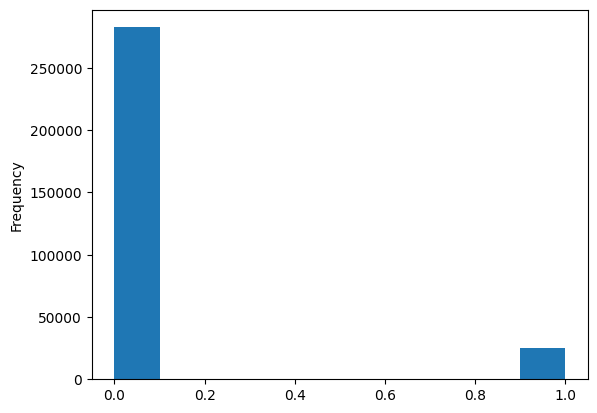

In [7]:
app_train['TARGET'].astype(int).plot.hist()

- 이 정보를 통해 우리는 이것이 불균형적인 계층 문제임을 알 수 있습니다. 제때 상환된 대출이 상환되지 않은 대출보다 훨씬 많습니다. 우리가 좀 더 정교한 기계 학습 모델에 들어가면, 우리는 이 불균형을 반영하기 위해 데이터에서의 표현으로 클래스에 가중치를 부여할 수 있습니다.

### Examine Missing Value
다음으로 각 열의 결측값 수와 백분율을 확인합니다. 

In [8]:
def missing_values_table(df):
  """
  데이터프레임에서 결측값이 있는 열들의 개수와 해당 열들의 결측값 비율을 계산하는 함수
  return : mis_val_table_ren_columns(결측값 정보 데이터 프레임임)
  """
  mis_val = df.isnull().sum() #결측값의 개수
  mis_val_percent = 100*df.isnull().sum()/len(df) #결측값 비율 
  #결측값 개수와 비율을 하나의 데이터 프레임으로 합침
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  #데이터 프레임 칼럼 이름 지정
  mis_val_table_ren_columns = mis_val_table.rename(
      columns = {0:'Missing Values', 1 : '% of Total Values'}
  )
  #내림차순 정렬, 반올림림
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
          '% of Total Values', ascending=False).round(1)

  #데이터 프레임의 전체 열 수와 결측값 정보출력력
  print('Your selected dataframe has ' + str(df.shape[1])+' columns.\n'
  'There are ' + str(mis_val_table_ren_columns.shape[0])+ ' columns that have missing values.')

  return mis_val_table_ren_columns
        


In [9]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


- 기계 학습 모델을 구축할 때가 되면 이러한 누락된 값을 채워야 합니다. 이후 작업에서는 XGBoost와 같은 모델을 사용하여 귀책자 없이 결측값을 처리할 수 있습니다. 결측값의 비율이 높은 열을 삭제하는 것도 방법이지만 이러한 열이 모형에 도움이 되는지 여부를 미리 알 수는 없습니다. 따라서 우리는 현재 모든 열을 보관할 것입니다.

### Column Types
각 데이터 유형의 열 수를 살펴보겠습니다. int64와 float64는 숫자 변수입니다(연속형 또는 연속형일 수 있음). 객체 열은 문자열을 포함하며 범주형 피쳐입니다.

In [10]:
#각 열의 데이터 타입의 개수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 개체(범주형) 열의 고유 항목 수를 살펴보겠습니다.

In [11]:
#object타입의 열들에 대한 고유한 class의 개수
#pd.Series.nunique함수 : 시리즈 객체에 포함된 고유한 원소의 개수반환
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- 대부분의 범주형 변수에는 비교적 적은 수의 고유 항목이 있습니다. 우리는 이러한 범주형 변수들을 다룰 방법을 찾아야 할 것입니다!



###Encoding Categorical Variables
우리가 더 나아가기 전에, 우리는 성가신 범주적 변수들을 다룰 필요가 있습니다. 불행히도 기계 학습 모델은 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델 제외). 따라서 모델에 전달하기 전에 이러한 변수를 숫자로 인코딩(표현)하는 방법을 찾아야 합니다. 이 프로세스를 수행하는 두 가지 주요 방법은 다음과 같습니다

- Label encoding: 범주형 변수의 각 고유 범주에 정수를 할당합니다. 새 열이 생성되지 않습니다. 예는 다음과 같습니다
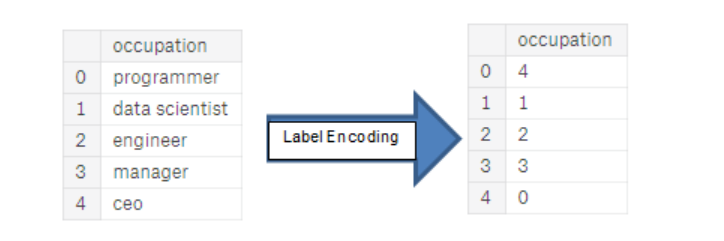

  - One-hot encoding: 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다. 각 관측치는 해당 범주에 대해 열에 1을 받고 다른 모든 새 열에는 0을 받습니다.

  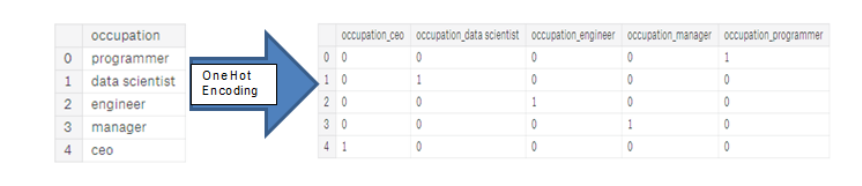

- 레이블 인코딩의 문제는 범주에 임의 순서를 부여한다는 것입니다. 각 범주에 할당된 값은 랜덤하며 범주의 고유한 측면을 반영하지 않습니다. 위의 예에서 프로그래머는 4, 데이터 과학자는 1을 받지만 동일한 프로세스를 다시 수행하면 레이블이 뒤바뀌거나 완전히 다를 수 있습니다. 정수의 실제 할당은 임의입니다. 따라서 레이블 인코딩을 수행할 때 모델은 형상의 상대적 값(예: 프로그래머 = 4 및 데이터 과학자 = 1)을 사용하여 원하는 가중치가 아닌 가중치를 할당할 수 있습니다. 범주형 변수(예: 남성/여성)에 대해 고유한 값이 두 개만 있는 경우 레이블 인코딩은 괜찮지만, 두 개 이상의 고유한 범주에 대해서는 단일 핫 인코딩이 안전합니다.


- 이러한 접근 방식의 상대적 장점에 대해 약간의 논쟁이 있으며, 일부 모델은 레이블로 인코딩된 범주형 변수를 문제 없이 처리할 수 있습니다. 다음은 스택 오버플로에 대한 좋은 토론입니다. 클래스가 많은 범주형 변수에 대해, 단일 핫 인코딩은 범주에 임의의 값을 부과하지 않기 때문에 가장 안전한 접근 방식이라고 생각합니다. 단일 핫 인코딩의 유일한 단점은 기능(데이터 차원)의 수가 범주가 많은 범주형 변수와 함께 폭발적으로 증가할 수 있다는 것입니다. 이 문제를 해결하기 위해, 우리는 PCA 또는 다른 차원 축소 방법에 이어 원핫 인코딩을 수행하여 차원 수를 줄일 수 있습니다(정보를 보존하려고 노력하는 동안).


- 이 노트북에서는 범주가 2개인 범주형 변수에는 레이블 인코딩을 사용하고 범주가 2개 이상인 범주형 변수에는 단일 핫 인코딩을 사용합니다. 이 프로세스는 프로젝트를 진행함에 따라 변경되어야 할 수도 있지만, 지금은 이 작업이 어떤 결과를 가져올지 지켜볼 것입니다. (또한 이 노트북에서는 차원 축소를 사용하지 않고 향후 반복적으로 살펴보겠습니다.).

#### Label Encoding and One-Hot Encoding
- 위에서 설명한 정책을 구현해 보겠습니다. 고유한 범주가 2개인 범주 변수(dtype == 개체)의 경우 레이블 인코딩을 사용하고, 고유한 범주가 2개 이상인 범주 변수의 경우 원핫 인코딩을 사용합니다.

- 레이블 인코딩의 경우 Scikit-Learn Label Encoder를 사용하고, 원핫 인코딩의 경우 panda get_dummies(df) 함수를 사용합니다.

In [12]:
#object 타입의 열들 중에서 고유한 클래스의 개수가 2개 이하인 열들에 대해 레이블 인코딩을 수행
le = LabelEncoder()
le_count = 0

for col in app_train:
  if app_train[col].dtype == 'object':  #app_train 데이터의 object타입 열들에 대해
    if len(list(app_train[col].unique())) <= 2: #현재 열의 고유 클래스가 2개 이하인 경우
      #fit 함수와 transform 함수를 통해 정수로 변환환
      le.fit(app_train[col])
      app_train[col] = le.transform(app_train[col]) 
      app_test[col] = le.transform(app_test[col])
      le_count += 1
  
print('%d columns were label encoded.' %le_count)

3 columns were label encoded.


In [13]:
#get_dummies함수 : 범주형 데이터를 one-hot encoding으로 변환환
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


#### Aligning Training and Testing Data

- training과 Testing 데이터 모두에 동일한 기능(열)이 있어야 합니다. test 데이터에 범주가 표시되지 않은 일부 범주형 변수가 있었기 때문에 일회성 인코딩으로 인해 train 데이터에 더 많은 열이 생성되었습니다. test 데이터에 없는 train 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다. 
- 먼저 train 데이터에서 대상 열을 추출합니다. 정렬을 수행할 때 행이 아닌 열을 기준으로 데이터 프레임을 정렬하도록 축 = 1을 설정해야 합니다!


In [14]:
train_labels = app_train['TARGET']

#align메서드는 app_train과 app_test의 열을 맞춤(inner join : 공통된 열만 남김)
app_train, app_test = app_train.align(app_test, join = 'inner', axis=1)

#app_train 데이터에 Target 열 추가
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


- training and testing 데이터 세트는 이제 기계 학습에 필요한 동일한 기능을 가지고 있습니다. 일회성 인코딩으로 인해 기능 수가 크게 증가했습니다. 언젠가는 데이터 세트의 크기를 줄이기 위해 차원 축소(관련 없는 기능 제거)를 시도하고 싶을 것입니다.

### Back to Exploratory Data Analysis

#### Anomalies(이상징후)
- EDA를 수행할 때 항상 주의해야 할 한 가지 문제는 데이터 내의 이상입니다. 숫자를 잘못 입력하거나 측정 장비에 오류가 있거나 유효하지만 극단적인 측정일 수 있습니다. 

- 이상 징후를 정량적으로 지원하는 한 가지 방법은 설명 방법을 사용하여 열의 통계량을 살펴보는 것입니다. 

In [15]:
#DAYS_Birth 열의 숫자는 현재 대출 신청과 관련하여 기록되므로 음수입니다.
#이러한 통계를 년 단위로 보려면 -1을 곱하고 1년 단위의 일수로 나눕니다
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이들은 합리적인 것 같습니다. 상한 또는 하한에 연령에 대한 특이치가 없습니다.

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

근무 일자는 옳지 않아 보입니다. 최대 값은 약 1000년 입니다. 

Text(0.5, 0, 'Days Employment')

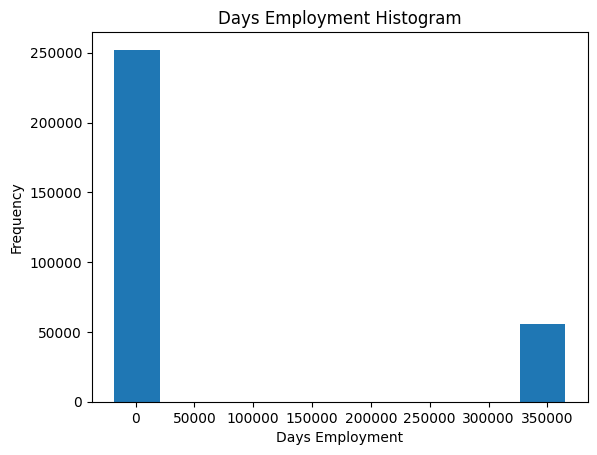

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

단순 호기심으로, 비정상적인 클라이언트의 하위 집합을 설정하여 다른 클라이언트보다 기본값 비율이 높거나 낮은 경향이 있는지 확인해 보겠습니다.

In [18]:
# 'DAYS_EMPLOYED' 열이 365243인 행을 anom 변수에 할당 나머지는 non_anom
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

#비정상/정상 열 별 Target의 미상환 대출(Target)비율 출력력
print('The non-anomalies default on %0.2f%% of loans' %(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100*anom['TARGET'].mean()))

#비정상 변수의 개수 출력
print('There are %d anomalous days of employment' %len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


- 이상 징후는 기본값의 비율이 더 낮은 것으로 나타났습니다.

- 이상 징후를 처리하는 방법은 설정된 규칙이 없는 정확한 상황에 따라 달라집니다. 가장 안전한 접근법 중 하나는 기계 학습 전에 이상 징후를 결측값으로 설정한 다음 (귀속 사용)에 입력시키는 것입니다. 이 경우 모든 이상 징후의 가치가 정확히 같기 때문에 이 모든 대출이 공통점을 공유할 경우를 대비해 동일한 가치로 작성하고자 합니다.
 
- 비정상적인 값은 어느 정도 중요한 것으로 보이기 때문에 실제로 이러한 값을 채웠는지 기계 학습 모델에 알려주고 싶습니다. 해결책으로 비정상적인 값을 숫자(np.nan)가 아닌 값으로 채운 다음 값이 비정상적이었는지 여부를 나타내는 부울 열을 새로 만듭니다

Text(0.5, 0, 'Days Employment')

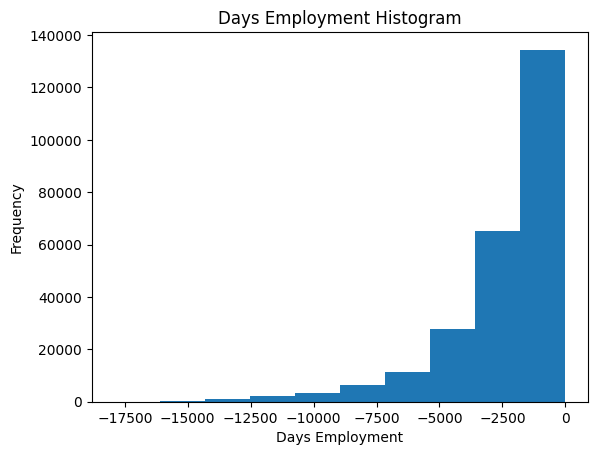

In [19]:
#365243 값을 nan으로 대체
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

- 분포는 우리가 예상하는 것과 훨씬 더 일치하는 것으로 보이며, 이러한 값이 원래 비정상적이었다는 것을 모형에 알리기 위해 새 열을 만들었습니다(일부 값, 아마도 열의 중위수). 데이터 프레임에 DAYS가가 있는 다른 열은 뚜렷한 특이치가 없는 상태에서 예상되는 값에 대한 것으로 보입니다.

- traning 데이터에 대해 수행하는 모든 작업은 testing 데이터에도 수행해야 합니다. 새 열을 만들고 검정 데이터에 기존 열을 np.nan으로 채우도록 하겠습니다.

In [20]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the thest data out of %d entries'
        %(app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the thest data out of 48744 entries


### Correlations

- 이제 범주형 변수와 특이치를 다루었으므로 EDA를 계속 진행하겠습니다. 데이터를 이해하고 이해하는 한 가지 방법은 형상과 대상 사이의 상관 관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 목표값 사이의 Pearson 상관 계수를 계산할 수 있습니다.

- 상관 계수는 형상의 "관련성"을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 개념을 제공합니다. 상관 계수의 절대값에 대한 일반적인 해석은 다음과 같습니다:

  - .00-.19 "매우 약함"
  - .20-.39 "약함"
  - .40-.59 "표준"
  - .60-.79 "강력"
  - .80-1.0 "매우 강한"

In [21]:
# 타겟 변수(TARGET)와 다른 변수들 간의 피어슨 상관계수를 계산하고 
#그 중에서 가장 양의 상관관계를 갖는 변수 15개와 가장 음의 상관관계를 갖는 변수 15개를 출력

correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

- 몇 가지 더 중요한 상관 관계를 살펴보겠습니다. DAYS_BIRTH가 가장 긍정적인 상관 관계입니다. 설명서를 보면 DAYS_BIRTH는 대출 당시 고객의 연령(일)입니다. 상관 관계는 양수이지만 이 기능의 값은 실제로 음수입니다. 즉, 고객이 나이가 들수록 대출을 연체할 가능성이 낮아집니다(목표값 == 0). 조금 헷갈리기 때문에 형상의 절대값을 취한 다음 상관관계가 음수가 됩니다.

### Effect of Age on Repayment

In [22]:
#절대값을 취한 다음 상관관계 출력
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

- 고객이 나이가 들수록 대출금을 제때 상환하는 경향이 있다는 것을 의미하는 목표와 부정적인 선형 관계가 있습니다.

- 이제 이 변수에 대해 알아보겠습니다. 첫째, 우리는 age의 히스토그램을 만들 수 있습니다. 줄거리를 좀 더 이해할 수 있도록 x축을 몇 년 안에 넣을 것입니다.

Text(0, 0.5, 'Count')

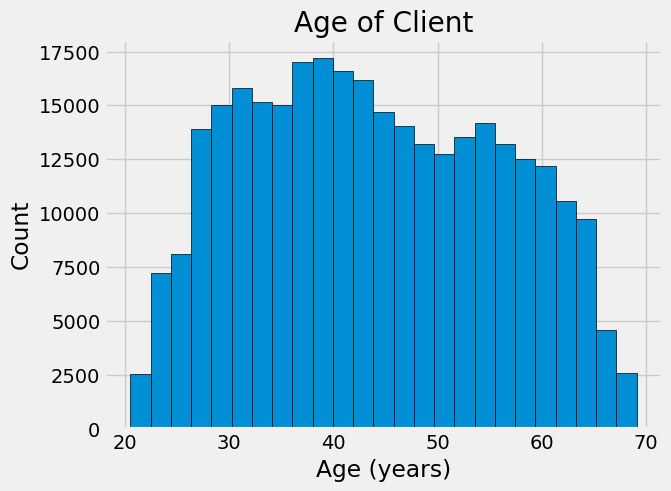

In [23]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

- 나이의 분포는 모든 나이가 합리적이기 때문에 특이치가 없다는 것 외에는 많은 것을 알려주지 않습니다. 

- 대상에 대한 연령의 영향을 시각화하기 위해 대상의 값으로 색칠된 커널 밀도 추정 플롯(KDE)을 만들 것입니다. 커널 밀도 추정도는 단일 변수의 분포를 보여주며 평활 히스토그램으로 간주할 수 있습니다(각 데이터 지점에서 커널(일반적으로 가우스)을 계산한 다음 모든 개별 커널을 평균하여 단일 평활 곡선을 생성함). 이 그래프에는 Seaborn kde 그림을 사용합니다.

Text(0.5, 1.0, 'Distribution of Ages')

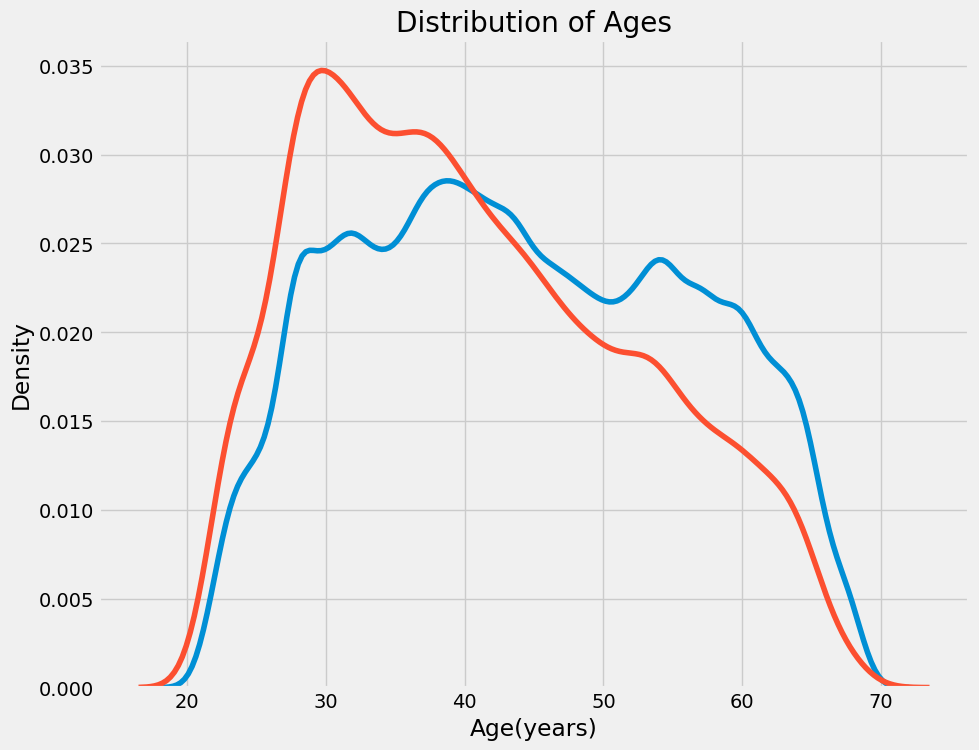

In [24]:
plt.figure(figsize = (10,8))
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label = 'target == 1')

plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

- 목표값 == 1 곡선은 범위의 더 젊은 쪽으로 기울어져 있습니다. 이 변수는 유의한 상관 관계(-0.07 상관 계수)는 아니지만 대상에 영향을 미치기 때문에 기계 학습 모델에서 유용할 수 있습니다. 

- 이 관계를 다른 방식으로 살펴봅시다: 연령대별 평균 대출금 상환 실패.

- 이 그래프를 만들기 위해 먼저 연령 범주를 각각 5년 단위의 빈으로 잘라냅니다. 그런 다음 각 빈에 대해 목표값의 평균값을 계산하는데, 이는 각 연령대별로 상환되지 않은 대출의 비율을 알려줍니다.

In [25]:
#age 범주를 5년 단위의 빈으로 나눔눔
age_data = app_train[['TARGET', 'DAYS_BIRTH']]

#days_birth열을 365로 나누어 year_birth에 저장
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
#year_birth 값을 11개의 구간으로 나눠 binned에 저장
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20,70,num=11))
age_data.head(10)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [26]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

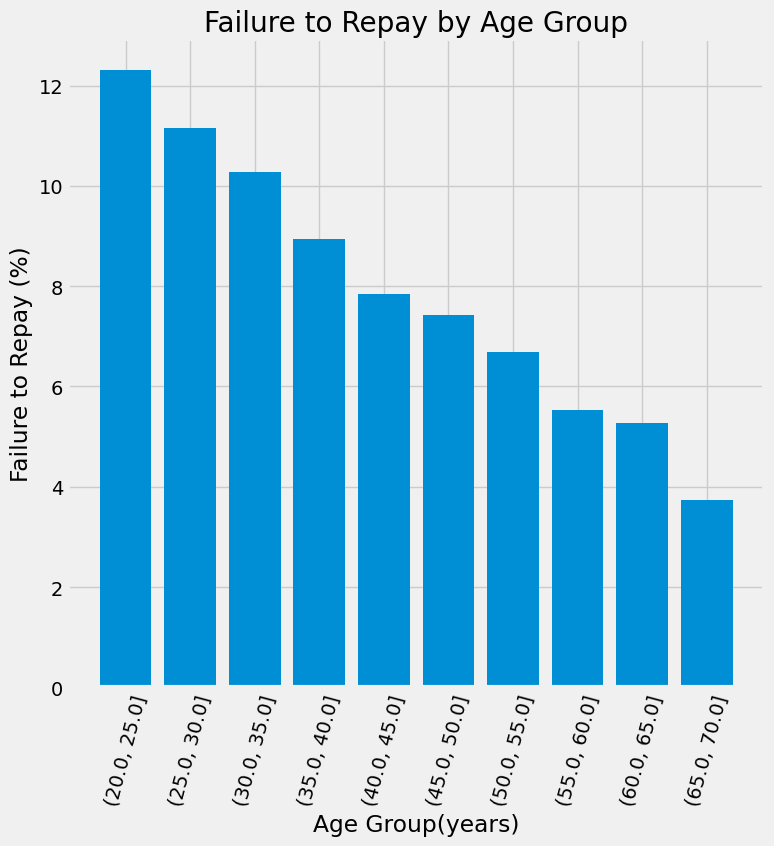

In [27]:
plt.figure(figsize = (8,8))

plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group(years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

- 분명한 추세가 있습니다. 젊은 지원자들은 대출금을 상환하지 않을 가능성이 더 높습니다! 상환 실패율은 최연소 3세 그룹은 10% 이상, 최고령 그룹은 5% 미만입니다.

- 이것은 은행이 직접 사용할 수 있는 정보입니다. 젊은 고객들이 대출금을 상환할 가능성이 낮기 때문에, 그들에게 더 많은 지침이나 재정 계획 팁을 제공해야 할 수도 있습니다. 이것은 은행이 젊은 고객들을 차별해야 한다는 것을 의미하지는 않지만, 젊은 고객들이 제때 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.


###Exterior Sources

- 대상과 음의 상관관계가 가장 강한 변수는 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3입니다. 설명서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다. 이것이 정확히 무엇을 의미하는지는 모르겠지만, 그것은 수많은 데이터 소스를 사용하여 만들어진 일종의 누적된 신용 등급일 수 있습니다.

- 이 변수들을 살펴보겠습니다.



In [28]:
# 먼저 EXT_SOURCE와 target 및 서로의 상관 관계를 보여줄 수 있습니다.

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

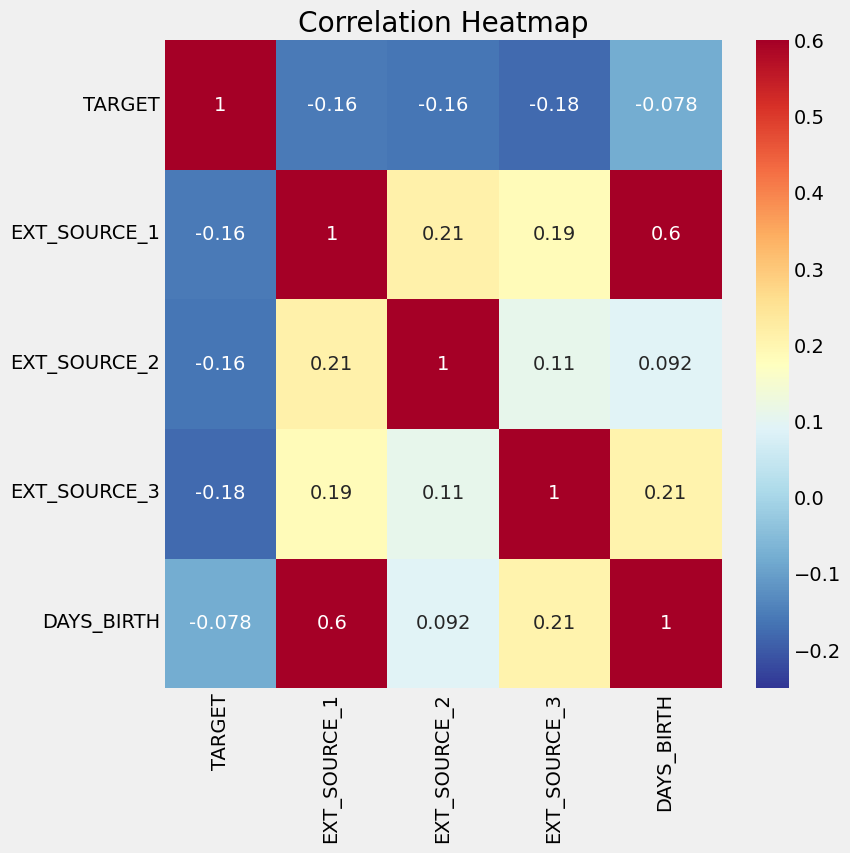

In [29]:
plt.figure(figsize = (8,8))

sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

- 세 가지 EXT_SOURCE는 모두 target과 음의 상관관계를 가지므로 EXT_SOURCE의 값이 증가할수록 클라이언트가 대출금을 상환할 가능성이 높아집니다.

- 또한 DAYS_BIRTH가 EXT_SOURCE_1과 양의 상관관계가 있음을 알 수 있으며, 이 점수의 요인 중 하나가 클라이언트 연령일 수 있습니다.

- 다음으로 대상의 값에 따라 색상이 지정된 각 형상의 분포를 살펴볼 수 있습니다. 이렇게 하면 대상에 대한 이 변수의 효과를 시각화할 수 있습니다.

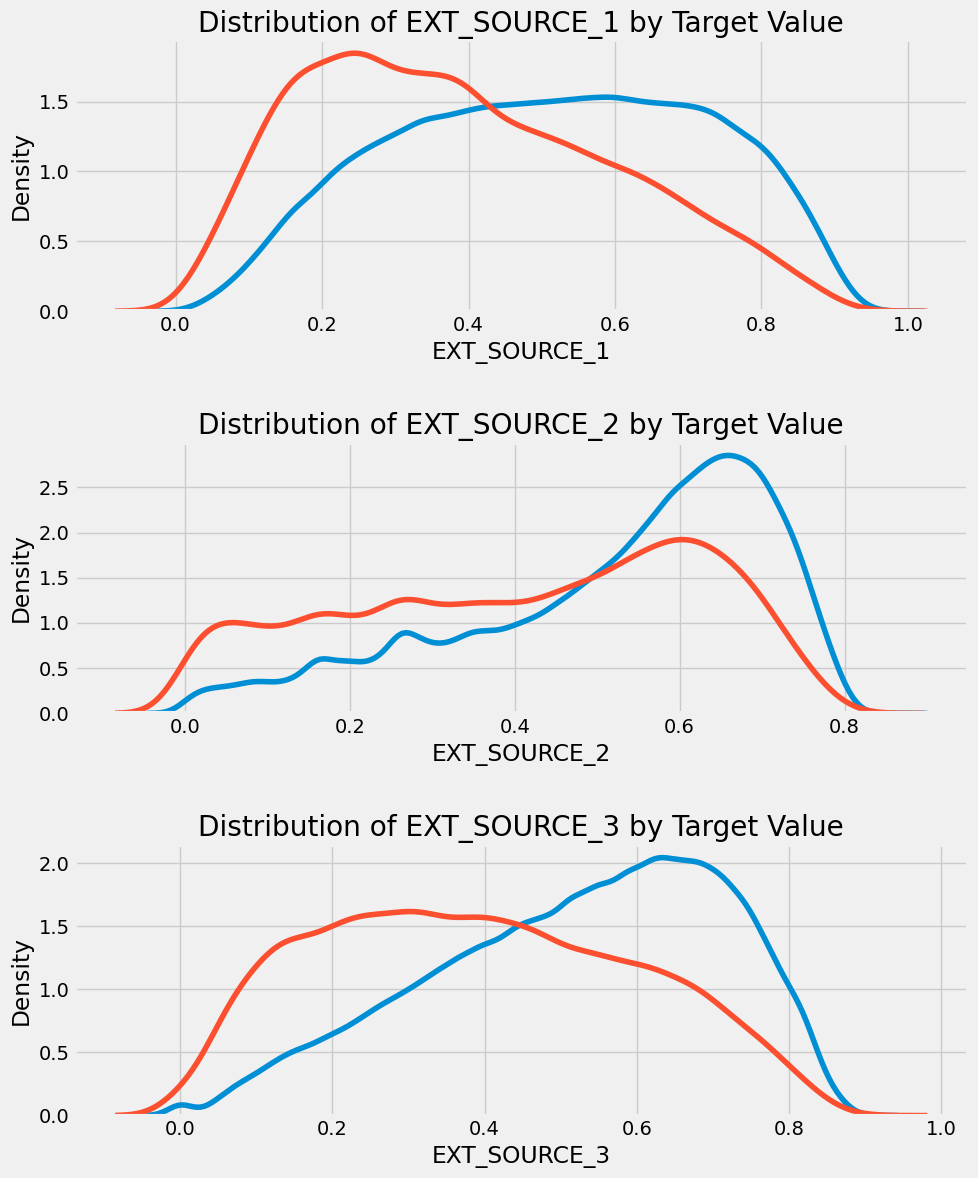

In [30]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
  plt.subplot(3,1,i+1)
  sns.kdeplot(app_train.loc[app_train['TARGET']==0, source], label='target==0')
  sns.kdeplot(app_train.loc[app_train['TARGET']==1, source], label='target==1')
  plt.title('Distribution of %s by Target Value' %source)
  plt.xlabel('%s' %source)
  plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

- EXT_SOURCE_3은 대상 값 간의 가장 큰 차이를 표시합니다. 우리는 이 특징이 신청자가 대출금을 상환할 가능성과 어느 정도 관련이 있다는 것을 분명히 알 수 있습니다.
 
- 관계는 그리 강하지 않습니다(사실 모두 매우 약한 것으로 간주되지만, 이러한 변수는 신청자가 대출금을 제때 상환할지 여부를 예측하는 기계 학습 모델에 여전히 유용합니다).


#### Pairs Plot
- 최종 탐색 그림으로 EXT_SOURCE 변수와 DAYS_BORT 변수의 쌍 그림을 만들 수 있습니다. 쌍 그림을 사용하면 여러 변수 쌍 간의 관계와 단일 변수의 분포를 볼 수 있으므로 유용한 탐색 도구입니다. 여기서는 Seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 위쪽 삼각형에 산점도, 대각선에 히스토그램, 아래쪽 삼각형에 2D 커널 밀도 그림 및 상관 계수가 있는 쌍 그림을 만듭니다.

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

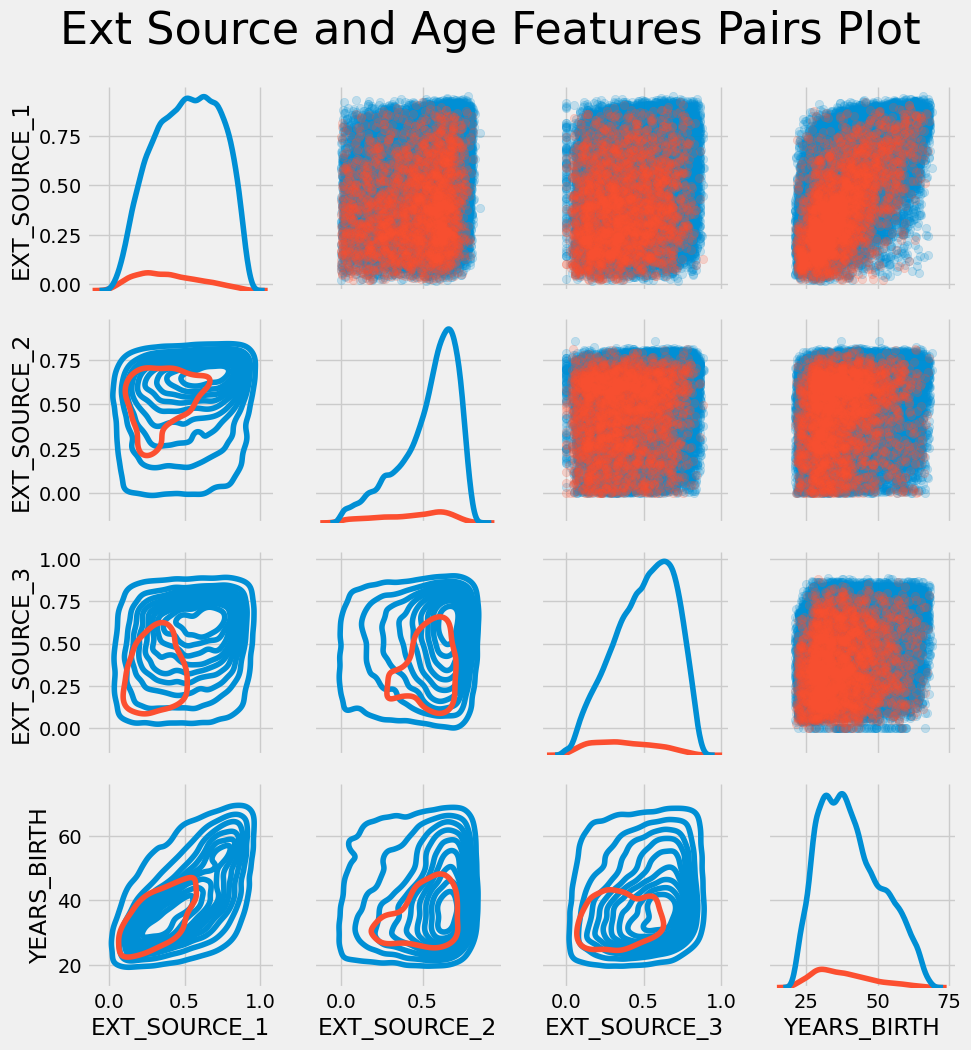

In [31]:
#ext_data에서 DAYS_BIRTH변수를 제외하고 plot_data에 복사
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
#YEARS_BIRTH열 추가, 데이터는 결측값을 제외하고 10만개까지만 사용
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]

def corr_func(x, y, **kwargs):
  '''
   x, y 두 변수의 상관관계 계수를 계산하여 subplot에 주석으로 추가하는 함수
  '''
  #corrcoef: 상관계수 표시
  r = np.corrcoef(x,y)[0][1]
  ax = plt.gca()
  #xycoords: 좌표 체계 지정
  ax.annotate("r = {:.2f}".format(r), xy=(.2,.8), xycoords=ax.transAxes, size=20)

#PairPlot grid 생성, diag_sharey옵션은 y축 눈금 공유 여부 설정
grid = sns.PairGrid(data = plot_data, diag_sharey=False, hue = 'TARGET', 
                    vars =[x for x in list(plot_data.columns)if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha =0.2) #위쪽에 산점도
grid.map_diag(sns.kdeplot) #대각선에 히스토그램
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r) #아래쪽에 밀도 그래프

plt.suptitle('Ext Source and Age Features Pairs Plot', size =32, y=1.05)

- 이 그림에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 지급된 대출을 나타냅니다.

- 우리는 데이터 내에서 서로 다른 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BORT(또는 이와 동등하게 YEARS_BORT) 사이에는 중간 정도의 양의 선형 관계가 있는 것으로 나타나 이 기능이 클라이언트의 연령을 고려할 수 있음을 나타냅니다.

#Feature Enginnering

- Kaggle 대회는 기능 엔지니어링에 의해 우승됩니다. 이 우승자들은 데이터에서 가장 유용한 기능을 만들 수 있는 사람들입니다.  이것은 머신 러닝의 패턴 중 하나를 나타냅니다. 
기능 엔지니어링은 모델 구축 및 하이퍼 파라미터 튜닝보다 투자 수익률이 높습니다. Andrew Ng가 좋아하는 말처럼, "응용된 기계 학습은 기본적으로 기능 엔지니어링입니다."

- 올바른 모델과 최적의 설정을 선택하는 것이 중요하지만 모델은 주어진 데이터를 통해서만 학습할 수 있습니다. 이 데이터가 작업과 최대한 관련이 있는지 확인하는 것이 데이터 과학자의 일입니다(그리고 도움이 되는 자동화된 도구도 있을 수 있습니다).

- 형상 공학(Feature Enginnering)은 일반적인 프로세스를 말하며 형상 구성을 모두 포함할 수 있습니다. 즉, 기존 데이터에서 새 형상을 추가하는 것과 형상 선택: 가장 중요한 형상만 선택하거나 치수 감소의 다른 방법을 선택하는 것입니다. 피쳐를 작성하고 피쳐를 선택하는 데 사용할 수 있는 많은 기술이 있습니다.

- 다른 데이터 소스를 사용하기 시작할 때 많은 기능 엔지니어링을 수행하지만 이 노트북에서는 두 가지 간단한 기능 구성 방법만 시도합니다:
  - 다항식 특징
  - 도메인 지식 기능

  


###Polynomial Features

- 한 가지 간단한 형상 구성 방법을 다항식 형상이라고 합니다. 이 방법에서, 우리는 기존 특징 간의 상호 작용 항뿐만 아니라 기존 특징의 힘인 특징을 만듭니다.
 예를 들어 EXT_SOURCE_1^2 및 EXT_SOURCE_2^2 변수와 EXT_SOURCE_1 x EXT_SOURCE_1^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2 등의 변수를 생성할 수 있습니다. 여러 개별 변수의 조합인 이러한 기능을 변수 간의 교호작용을 캡처하기 때문에 교호작용 항이라고 합니다. 
 
 - 즉, 두 변수 자체는 목표값에 큰 영향을 미치지 않을 수 있지만 이들 변수를 하나의 교호작용 변수로 결합하면 목표값과의 관계를 나타낼 수 있습니다. 상호 작용 용어는 여러 변수의 효과를 포착하기 위해 통계 모델에서 일반적으로 사용되지만 기계 학습에서 그렇게 자주 사용되지는 않습니다. 그럼에도 불구하고 고객이 대출금을 상환할지 여부를 예측하는 데 모델이 도움이 되는지 몇 가지를 시도해 볼 수 있습니다.

- Jake Vander Plas는 더 많은 정보를 원하는 사람들을 위해 그의 훌륭한 책 Python for Data Science에서 다항식의 특징에 대해 쓰고 있습니다.

- 다음 코드에서는 EXT_SOURCE 변수와 DAYS_BORT 변수를 사용하여 다항식 피쳐를 만듭니다. Scikit-Learn에는 다항식과 지정된 수준까지의 교호작용 항을 생성하는 다항식 특성이라는 유용한 클래스가 있습니다. 결과를 보기 위해 3도를 사용할 수 있습니다(다항적 특징을 만들 때는 특징의 수가 정도에 따라 기하급수적으로 증가하고 과적합 문제에 직면할 수 있기 때문에 너무 높은 정도를 사용하는 것을 피하고 싶습니다).


In [32]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

#결측치를 처리를 위해 SimpleImputer import, median법 사용
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

#Target 컬럼 제거
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

#결측지 대체
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

#PolynomialFeatures: 다항식 특성을 만들어주는 클래스
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=3) #다항식 차수는 3

In [33]:
#다항기 생성기 모델을 poly_features 데이터에 맞게 학습시킴
poly_transformer.fit(poly_features)

#데이터에 다항식 특성 생성
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


이를 통해 상당한 수의 새로운 기능이 생성됩니다. 이름을 얻으려면 다항식 기능 get_feature_names 메서드를 사용해야 합니다.

In [34]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
#다항식 특징 생성(Polynomial Feature Generation)을 수행
# 다항식 항의 이름 중 처음 15개만 추출하여 poly_features_names 리스트에 저장장
poly_features_names = poly_transformer.get_feature_names_out(
    input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

print(poly_features_names)

['1' 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'DAYS_BIRTH'
 'EXT_SOURCE_1^2' 'EXT_SOURCE_1 EXT_SOURCE_2' 'EXT_SOURCE_1 EXT_SOURCE_3'
 'EXT_SOURCE_1 DAYS_BIRTH' 'EXT_SOURCE_2^2' 'EXT_SOURCE_2 EXT_SOURCE_3'
 'EXT_SOURCE_2 DAYS_BIRTH' 'EXT_SOURCE_3^2' 'EXT_SOURCE_3 DAYS_BIRTH'
 'DAYS_BIRTH^2']


35개의 특징이 있으며, 최대 3단계까지의 거듭제곱과 교호작용 항을 포함합니다. 이제 이러한 새 기능이 대상과 상관 관계가 있는지 확인할 수 있습니다.

In [36]:
#다항식 항을 데이터 프레임으로로 생성
poly_features = pd.DataFrame(
    poly_features, columns = poly_transformer.get_feature_names_out(
        ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target

#생성된 항과 TARGET 특징을 이용하여 상관계수 계산
poly_corrs = poly_features.corr()['TARGET'] = poly_target
poly_corrs=poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


- 새 변수 중 일부는 원래 형상보다 목표값과 (절대 크기 측면에서) 더 큰 상관 관계를 가집니다. 우리가 기계 학습 모델을 만들 때, 우리는 이러한 기능을 사용하거나 사용하지 않고 모델이 실제로 학습하는 데 도움이 되는지 여부를 결정할 수 있습니다.

- 이러한 기능을 교육 및 테스트 데이터 복사본에 추가한 다음 기능이 있는 모델과 없는 모델을 평가합니다. 기계 학습에서 여러 번, 접근법이 효과가 있을지 알 수 있는 유일한 방법은 그것을 시도하는 것입니다!

In [37]:
#train set과 test set에 다항식 항을 추가

# poly_transformer로 만든 다항 변수들을 이용하여 test 데이터셋을 변환한 데이터프레임을 생성
poly_features_test = pd.DataFrame(
    poly_features_test, columns = poly_transformer.get_feature_names_out(
        ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']

#poly_features에서 생성된 다항 변수들을 SK_ID_CURR 기준으로 합친 새로운 train 데이터셋을 생성
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how='left')

#test 데이터셋도 똑같이
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

#align메서드로 train과 test 데이터셋에서 공통적으로 가지고 있는 column들만 선택하여 데이터셋을 일치시킴
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis=1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial feautures shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial feautures shape:  (48744, 275)


### Domain Knowledge Features

- 저는 신용 전문가가 아니기 때문에 이것을 "도메인 지식"이라고 부르는 것이 완전히 정확하지는 않을 수도 있지만, 아마도 우리는 이것을 "제한된 금융 지식을 적용하려는 시도"라고 부를 수도 있습니다. 이러한 관점에서, 우리는 고객이 대출금을 연체할지 여부를 결정하는 데 중요하다고 생각하는 것을 포착하는 몇 가지 기능을 만들 수 있습니다. 여기서는 Aguiar가 작성한 이 스크립트에서 영감을 얻은 5가지 기능을 사용하겠습니다:

- CREDIT_INCOME_PERCENT: 고객의 소득에 대한 신용 금액의 백분율
- ANNUITY_INCOME_PERCENT: 고객의 소득과 관련된 대출 연금의 백분율
- CREDIt_TERM: 지급 기간(연금이 월 지급액이므로)
- DAYS_EMPLOYED_PERCENT: 클라이언트의 연령과 비교하여 고용된 날짜의 백분율



In [38]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED']/ app_train_domain['DAYS_BIRTH']

In [39]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables

- 우리는 그래프에서 이러한 도메인 지식 변수를 시각적으로 탐색해야 합니다. 이 모든 것에 대해 TARGET 값으로 색칠된 동일한 KDE 그림을 만들 것입니다

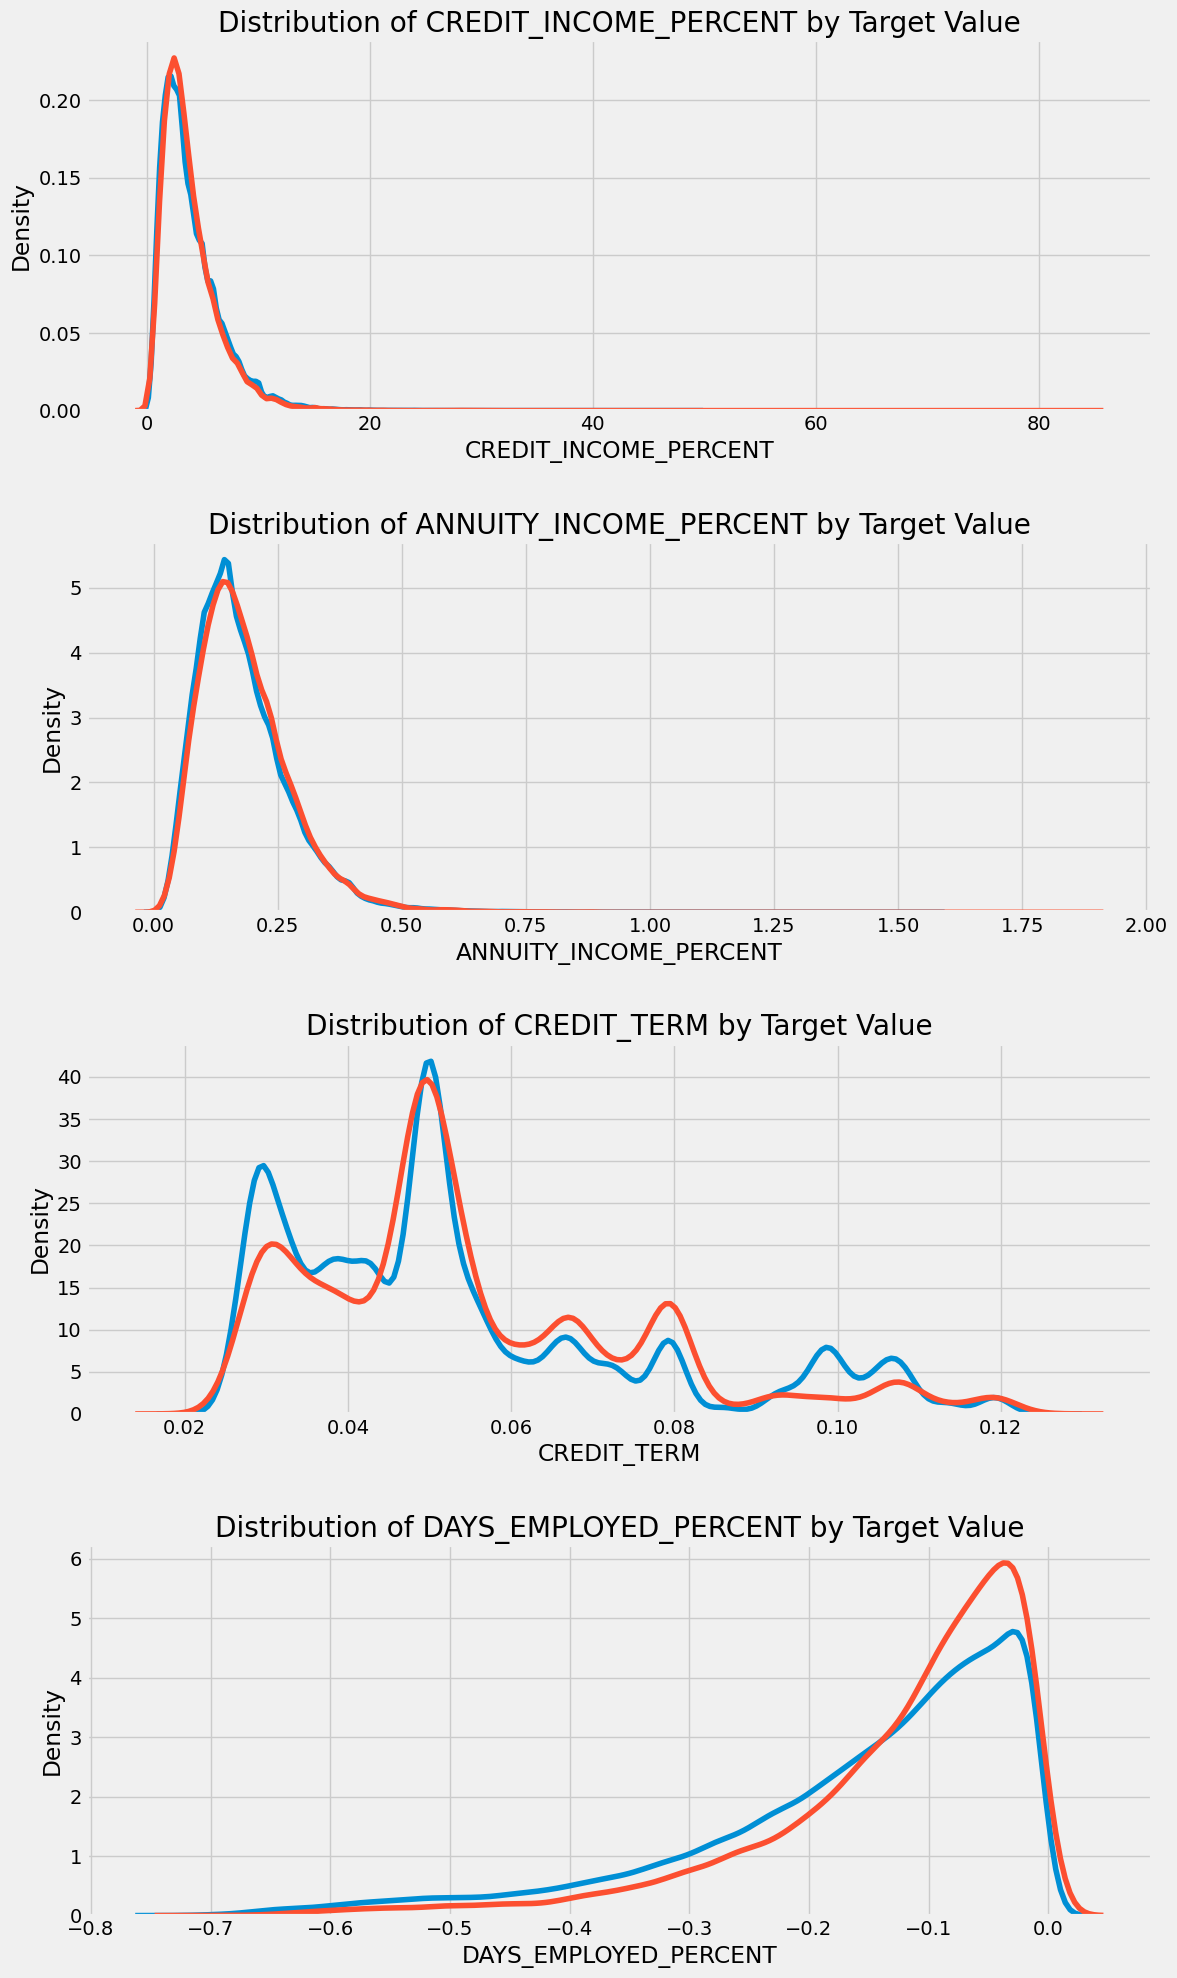

In [40]:
plt.figure(figsize = (12,20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', "CREDIT_TERM", 'DAYS_EMPLOYED_PERCENT']):
  plt.subplot(4,1,i+1)
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label = 'target==0')
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label = 'target==1')

  plt.title('Distribution of %s by Target Value' %feature)
  plt.xlabel('%s' %feature)
  plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

이러한 새로운 기능이 유용한지 여부를 미리 말하기는 어렵습니다. 확실하게 말할 수 있는 유일한 방법은 그것들을 시험해 보는 것입니다!

#Baseline

- 단순한 기준선의 경우 테스트 세트의 모든 예제에 대해 동일한 값을 추측할 수 있습니다. 대출금을 상환하지 않을 확률을 예측하라는 요청을 받았기 때문에 완전히 불확실한 경우 검정 세트의 모든 관측치에 대해 0.5를 추측할 수 있습니다. 이를 통해 경쟁에서 0.5점의 수신기 작동 특성 영역(AUCROC)을 얻을 수 있습니다(분류 과제에 대한 무작위 추측은 0.5점).

- 우리는 이미 몇 점을 받을지 알고 있기 때문에 순진한 기준 추측을 할 필요가 없습니다. 실제 기준에 대해 조금 더 정교한 모델을 사용해 보겠습니다: 로지스틱 회귀 분석.


### Logistic Regression  구현

- 기준선을 얻기 위해 범주형 변수를 인코딩한 후 모든 기능을 사용합니다. 결측값(귀납)을 채우고 형상 범위를 정규화(형상 스케일링)하여 데이터를 사전 처리합니다. 다음 코드는 이러한 전처리 단계를 모두 수행합니다

In [41]:
from sklearn.preprocessing import MinMaxScaler

#만약 app_train 데이터 프레임에 target이 있다면 drop, train에 app_train 복사사
if 'TARGET' in app_train:
  train = app_train.drop(columns =['TARGET'])
else:
  train = app_train.copy()

features = list(train.columns)
#test에도 app_test 복사사
test = app_test.copy()

#imputer-> 결측치 중앙값 대체, scaler -> 0과 1사이로 스케일링링
imputer = SimpleImputer(strategy = 'median')
scaler = MinMaxScaler(feature_range= (0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(app_test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


- 첫 번째 모델에는 Scikit-Learn의 로지스틱 회귀 분석을 사용합니다. 기본 모형 설정에서 변경할 수 있는 유일한 변경 사항은 과적합의 양을 제어하는 정규화 모수 C를 낮추는 것입니다(값이 낮을수록 과적합이 감소함). 이렇게 하면 기본 로지스틱 회귀 분석보다 약간 더 나은 결과를 얻을 수 있지만 이후의 모형에 대해서는 여전히 낮은 기준을 설정할 수 있습니다.

- 여기서는 익숙한 Scikit-Learn 모델링 구문을 사용합니다. 먼저 모델을 만든 다음 .fit를 사용하여 모델을 훈련한 다음 .predict_proba를 사용하여 테스트 데이터에 대한 예측을 합니다(0 또는 1이 아닌 확률을 원합니다).

- 로지스틱 회귀분석 모델은 이진 분류 모델로, 입력 변수의 가중치 합을 로짓 함수에 적용하여 0과 1 사이의 값을 예측하는 모델입니다. 이 모델을 구축하기 위해 scikit-learn 패키지의 LogisticRegression 클래스를 사용합니다. C는 규제 하이퍼파라미터로, 값이 작을수록 규제가 강해지며, 값이 클수록 규제가 약해집니다.

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

- 이제 모델이 훈련되었기 때문에, 우리는 그것을 예측하는 데 사용할 수 있습니다. 우리는 대출금을 지불하지 않을 확률을 예측하려고 하므로 predict.proba 모형을 사용합니다. m x 2 배열을 반환합니다. 여기서 m은 관측치의 수입니다. 첫 번째 열은 목표값이 0일 확률이고 두 번째 열은 목표값이 1일 확률입니다(따라서 단일 행의 경우 두 열의 합은 1이어야 함). 우리는 대출금이 상환되지 않을 확률을 원하기 때문에 두 번째 열을 선택하겠습니다.

- 다음 코드는 예측을 수행하고 올바른 열을 선택합니다.

In [43]:
# 대출금 상환 여부에 대한 예측값으로, 0과 1 사이의 값
log_reg_pred = log_reg.predict_proba(test)[:, 1]

- 예측은 sample_submission.csv 파일에 표시된 형식이어야 합니다. 여기에는 열이 두 개뿐입니다. SK_ID_CURR 및 대상. 우리는 테스트 세트와 제출이라는 예측에서 이 형식의 데이터 프레임을 만들 것입니다.

In [44]:
#로지스틱 회귀 모델(log_reg)을 사용하여 예측한 TARGET 값(log_reg_pred)을 submit 데이터프레임에 추가
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


- 예측은 대출이 상환되지 않을 확률이 0과 1 사이임을 나타냅니다. 만약 우리가 이러한 예측을 사용하여 신청자를 분류한다면, 우리는 대출이 위험하다는 것을 결정하기 위한 확률 임계값을 설정할 수 있을 것입니다.

In [45]:
submit.to_csv('log_reg_baseline.csv', index = False)

- 이제 제출이 노트북이 실행 중인 가상 환경에 저장되었습니다. 제출에 액세스하기 위해 노트북 끝에 있는 커널 오른쪽 상단의 파란색 Commit & Run 버튼을 누릅니다. 이렇게 하면 전체 노트북이 실행되고 실행 중에 생성된 파일을 다운로드할 수 있습니다.

- 노트북을 실행하면 생성된 파일을 출력 하위 탭의 버전 탭에서 사용할 수 있습니다. 여기서 제출 파일을 대회에 제출하거나 다운로드할 수 있습니다. 이 노트북에는 여러 모델이 있기 때문에 여러 개의 출력 파일이 있을 것입니다.

- 로지스틱 회귀 분석 기준선은 제출할 때 약 0.671의 점수를 받아야 합니다.


### Improved Model: Random Forest

- 베이스라인의 저조한 성능을 극복하기 위해 알고리즘을 업데이트할 수 있습니다. 동일한 교육 데이터에서 랜덤 포레스트를 사용하여 성능에 어떤 영향을 미치는지 알아보겠습니다. 
- 랜덤 포레스트는 특히 우리가 수백 그루의 나무를 사용할 때 훨씬 더 강력한 모델입니다. 우리는 무작위 숲에서 100그루의 나무를 사용할 것입니다.

In [46]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state=50, verbose=1, n_jobs=-1)

In [47]:
random_forest.fit(train, train_labels)

#학습된 분류기에서 각 특성의 중요도를 추출하여 feature_importance_values에 저장
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

#테스트 데이터에 대한 예측 확률을 계산
#[:, 1]을 사용하여 예측된 확률 값 중 1의 클래스에 해당하는 확률 값을 추출
predictions = random_forest.predict_proba(test)[:, 1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [48]:
submit = app_test["SK_ID_CURR"]
submit['TARGET'] = predictions
submit.to_csv('random_forest_baseline.csv', index=False)

- 이러한 예측은 전체 노트북을 실행할 때도 사용할 수 있습니다.

- 이 모델은 제출 시 약 0.678점을 받아야 합니다.


#### Make Predictions using Engineered Features
엔지니어링된 기능을 사용하여 예측
다항식 특성 및 도메인 지식이 모델을 향상시켰는지 확인하는 유일한 방법은 이러한 특성에 대한 테스트를 훈련시키는 것입니다! 그런 다음 이러한 기능이 없는 모델의 제출 성능과 비교하여 기능 엔지니어링의 효과를 측정할 수 있습니다.

In [49]:
#app_train_poly와 app_test_poly 데이터프레임에서 다항식 변수를 사용하여 랜덤 포레스트 모델을 학습

poly_features_names = list(app_train_poly.columns)
imputer = SimpleImputer(strategy='median')

#fit_transform과 transform 메소드를 사용하여 각각 학습 데이터와 테스트 데이터를 변환
poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range = (0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs=-1)

In [50]:
random_forest_poly.fit(poly_features, train_labels)

predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


In [51]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_baseline_engineered.csv', index=False)

- 이 모델은 경쟁사에 제출했을 때 0.678점을 받았는데, 이는 엔지니어링된 기능이 없는 모델과 정확히 동일합니다. 이러한 결과를 고려할 때, 우리의 기능 구성이 이 경우에 도움이 되지 않은 것으로 보입니다.

#### Testing Domain Features
이제 직접 만든 도메인 기능을 테스트할 수 있습니다.

In [53]:

app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_names = list(app_train_domain.columns)
imputer = SimpleImputer(strategy ='median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range = (0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose=1, n_jobs=-1)
random_forest_domain.fit(domain_features, train_labels)

feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


In [54]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('random_forest_baseline_domain.csv', index = False)


- 이 점수는 제출 시 0.679점으로, 엔지니어링된 기능이 이 모델에 도움이 되지 않는다는 것을 보여줍니다(그러나 노트북 끝에 있는 그라데이션 부스팅 모델에는 도움이 됩니다).

- 이후 노트북에서는 다른 데이터 소스의 정보를 사용하여 더 많은 기능 엔지니어링을 수행할 것입니다. 경험에 비추어 볼 때, 이것은 분명히 우리 모델에게 도움이 될 것입니다!

###Model Interpretation: Feature Importances

어떤 변수가 가장 관련성이 있는지 확인하는 간단한 방법으로 랜덤 포레스트의 기능 중요성을 살펴볼 수 있습니다. 탐색적 데이터 분석에서 본 상관관계를 고려할 때, 우리는 가장 중요한 기능이 EXT_SOURCE 및 DAYS_BORT라고 예상해야 합니다. 향후 작업에서 이러한 기능 중요도를 차원 축소 방법으로 사용할 수 있습니다.

In [59]:
def plot_feature_importances(df):
  df = df.sort_values('importance', ascending = False).reset_index()
  df['importance_normalized'] = df['importance']/df['importance'].sum()
  
  plt.figure(figsize=(10,6))
  ax = plt.subplot()
  ax.barh(list(reversed(list(df.index[:15]))),
          df['importance_normalized'].head(15),
          align = 'center', edgecolor = 'k')
  ax.set_yticks(list(reversed(list(df.index[:15]))))
  ax.set_yticklabels(df['feature'].head(15))

  plt.xlabel('Normalized importance')
  plt.title('Feature Importances')
  plt.show()

  return df

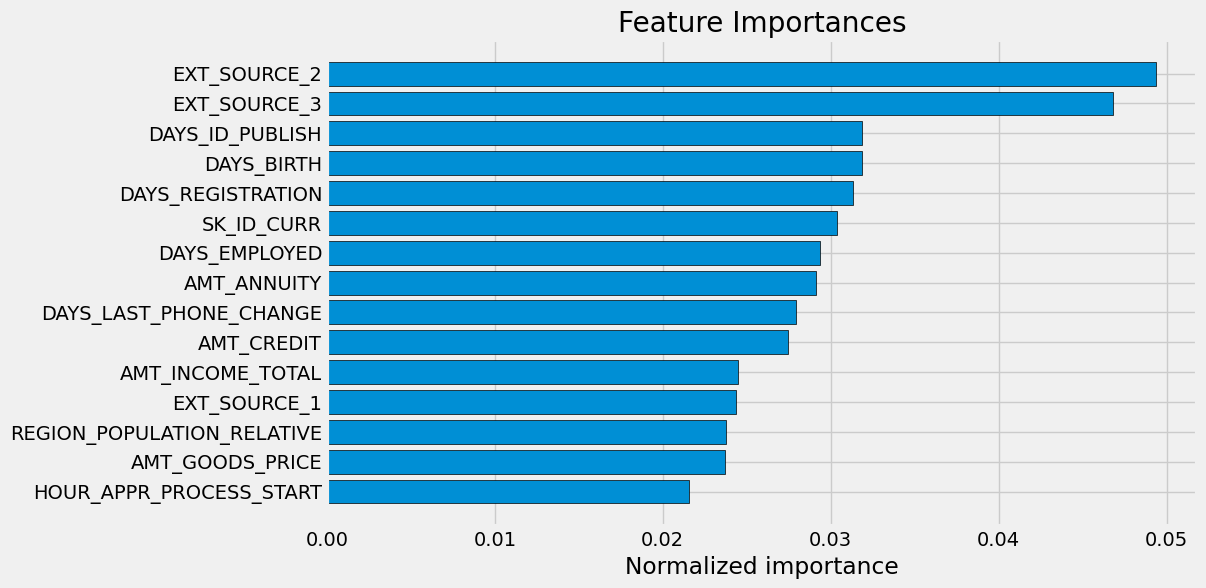

In [60]:
feature_importances_sorted = plot_feature_importances(feature_importances)

- 우리는 우리의 네 가지 수작업 기능이 모두 상위 15위 안에 드는 것을 보았습니다! 이것은 우리의 도메인 지식이 적어도 부분적으로는 정상 궤도에 올랐다는 확신을 줄 것입니다.

#Conclusions

- 이 노트북에서 우리는 카글 기계 학습 대회를 시작하는 방법을 보았습니다. 우리는 먼저 데이터, 우리의 업무, 그리고 우리의 제출물을 평가하는 기준을 확실히 이해했습니다. 그런 다음 모델링에 도움이 될 수 있는 관계, 추세 또는 이상 징후를 식별하기 위해 상당히 간단한 EDA를 수행했습니다. 그 과정에서 범주형 변수 인코딩, 결측값 귀속 및 범위에 대한 피쳐 스케일링과 같은 필요한 전처리 단계를 수행했습니다. 그런 다음 기존 데이터로 새로운 기능을 구성하여 모델에 도움이 될 수 있는지 확인했습니다.

- 데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면 개선하고자 하는 기본 모델을 구현했습니다. 그런 다음 우리는 첫 번째 점수를 이기기 위해 두 번째로 조금 더 복잡한 모델을 만들었습니다. 또한 엔지니어링 변수를 추가하는 효과를 확인하기 위한 실험을 수행했습니다.

- 우리는 기계 학습 프로젝트의 일반적인 개요를 따랐습니다:

  - 문제 및 데이터 이해
  - 데이터 정리 및 포맷(대부분 우리를 위해 수행됨)
  - 탐색적 데이터 분석
  - 기준 모형
  - 개선된 모델
  - 모델 해석(조금만)

- 기계 학습 경쟁은 단일 메트릭에서 최고의 성능을 달성하는 것에만 관심이 있고 해석에는 관심이 없다는 점에서 일반적인 데이터 과학 문제와 약간 다릅니다. 그러나 모델이 결정을 내리는 방법을 이해하려고 시도함으로써 오류를 수정하기 위해 모델을 개선하거나 오류를 검토할 수 있습니다. 향후 노트북에서는 더 많은 데이터 소스를 통합하고, (다른 사람의 코드를 따름으로써) 더 복잡한 모델을 구축하고, 점수를 향상시키는 방안을 검토할 것입니다.
